In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# change this to point to wherever you've put the data
data_dir = "F:\\GoogleDrive\\ds_ml\\RIT\\2022-01 DSCI.644\\project\\phase2\\"
data_path = data_dir + "project3-authors.csv"
df_raw = pd.read_csv(data_path)
# df_raw.shape   # (17317, 9)
# df_raw.columns # ['Name', 'CommitId', 'RefactoringType', 'FilePath', 'Class',
#                   'RefactoringDetail', 'Message', 'AuthorName', 'AuthorEmail']
# df_raw['Name'].unique()  # ['hibernate$hibernate-validator', 'eclipse$bpmn2-modeler',
#                             'adangel$pmd']
df_raw.head()

,Name,CommitId,RefactoringType,FilePath,Class,RefactoringDetail,Message,AuthorName,AuthorEmail
0,hibernate$hibernate-validator,a3af1683e63c9c800f486552e7e5002c24b6712b,Move Source Folder,src,NaN,Move Source Folder\tsrc to hibernate-validator...,Moved the legacy validator code into hibernate...,Hardy Ferentschik,hibernate@ferentschik.de
1,hibernate$hibernate-validator,6d6c3deaf0b499e06077383d8d3add43f30ba099,Move Source Folder,hibernate-validator-legacy/src,NaN,Move Source Folder\thibernate-validator-legacy...,Refactored build so that compile and test can ...,Hardy Ferentschik,hibernate@ferentschik.de
2,hibernate$hibernate-validator,6d6c3deaf0b499e06077383d8d3add43f30ba099,Move Source Folder,hibernate-validator-legacy/src/test,NaN,Move Source Folder\thibernate-validator-legacy...,Refactored build so that compile and test can ...,Hardy Ferentschik,hibernate@ferentschik.de
3,hibernate$hibernate-validator,25350de39ef9484997999f6e6d8f00abc5d51546,Extract Variable,hibernate-validator/src/main/java/org/hibernat...,org.hibernate.validation.engine.ValidatorImpl,Extract Variable\tleafBeanInstance : Object in...,BVAL-37 ConstraintDescriptor.getLeafValue()\n\...,Emmanuel Bernard,emmanuel@hibernate.org
4,hibernate$hibernate-validator,25350de39ef9484997999f6e6d8f00abc5d51546,Rename Method,hibernate-validator/src/main/java/org/hibernat...,org.hibernate.validation.engine.ValidatorImpl,Rename Method\tpublic getBeanConstraints() : E...,BVAL-37 ConstraintDescriptor.getLeafValue()\n\...,Emmanuel Bernard,emmanuel@hibernate.org


In [2]:
df_raw.columns

Index(['Name', 'CommitId', 'RefactoringType', 'FilePath', 'Class',
       'RefactoringDetail', 'Message', 'AuthorName', 'AuthorEmail'],
      dtype='object')

In [3]:
# filter for just the hibernate$hibernate-validator rows
df_hiber = df_raw[df_raw['Name'] == "hibernate$hibernate-validator"].copy()
df_adangle = df_raw[df_raw['Name'] == "adangel$pmd"].copy()
# df_hiber.shape  # (5399, 9) same row count as reported in phase 1 report, check
df_hiber.tail()

,Name,CommitId,RefactoringType,FilePath,Class,RefactoringDetail,Message,AuthorName,AuthorEmail
5394,hibernate$hibernate-validator,9e0626b8318ba4bdf55580aacae3947410278129,Extract Variable,engine/src/main/java/org/hibernate/validator/i...,org.hibernate.validator.internal.engine.Valida...,Extract Variable\tbeanMetaData : BeanMetaData<...,HV-1681 Separate out bean metadata aware Value...,marko-bekhta,marko.prykladna@gmail.com
5395,hibernate$hibernate-validator,9e0626b8318ba4bdf55580aacae3947410278129,Move Class,engine/src/main/java/org/hibernate/validator/i...,org.hibernate.validator.internal.engine.ValueC...,Move Class\torg.hibernate.validator.internal.e...,HV-1681 Separate out bean metadata aware Value...,marko-bekhta,marko.prykladna@gmail.com
5396,hibernate$hibernate-validator,59372ef6b92138b0c6a347ea16cd655576715252,Rename Variable,engine/src/main/java/org/hibernate/validator/i...,org.hibernate.validator.internal.engine.valuee...,Rename Variable\textractorDescriptorsToCache :...,HV-1684 Fix value extraction logic to avoid st...,Guillaume Smet,guillaume.smet@gmail.com
5397,hibernate$hibernate-validator,59372ef6b92138b0c6a347ea16cd655576715252,Rename Variable,engine/src/main/java/org/hibernate/validator/i...,org.hibernate.validator.internal.engine.valuee...,Rename Variable\textractorDescriptorsToCache :...,HV-1684 Fix value extraction logic to avoid st...,Guillaume Smet,guillaume.smet@gmail.com
5398,hibernate$hibernate-validator,571ab96b9ea2b32c2597f0765f59da28f5c029d9,Rename Method,engine/src/main/java/org/hibernate/validator/i...,org.hibernate.validator.internal.engine.path.P...,Rename Method\tpublic getPathWithoutLeafNode()...,HV-1691 Rename PathImpl#getPathWithoutLeafNode...,Guillaume Smet,guillaume.smet@gmail.com


In [4]:
# how many records do we lose if we drop rows with empty commit messages

# Feature Creation

## Features determined from adangel analysis

+ Authors - Response, ?? committers, may want to group by commit frequency as there are many of them
+ RefactoringTypes - ?? types
+ FilePath - How do we build a logical feature from this?
  - vector representation: cosine similarity should be higher among paths that share more path elements
  - e.g. if path 1 = a/b/c/d, path 2 = a/b/c/e, path 3 a/b/m/n then path 1 would have a higher cosine similarity to path 2 than to path 3.

In [6]:
# how are refactoring types distributed, do they differ between projects
refactor_types_hiber = df_hiber['RefactoringType'].value_counts()
refactor_types_adangle = df_adangle['RefactoringType'].value_counts()
# refactor_types.shape  # 27 types, should be same for all project
refactor_types_hiber = set(refactor_types_hiber.index)
refactor_types_adangle = set(refactor_types_adangle.index)
# len(refactor_types_adangle), len(refactor_types_hiber)
common_refactors = refactor_types_adangle.intersection(refactor_types_hiber)
different_refactors = refactor_types_adangle.difference(refactor_types_hiber)
# common_refactors
different_refactors  # empty set = no difference

set()

In [7]:
# how are file paths distributed
file_types = df_hiber['FilePath'].value_counts()
# file_types.shape  # 3139 types
file_types.head(10)

engine/src/main/java/org/hibernate/validator/internal/engine/ValidatorImpl.java                                      131
engine/src/main/java/org/hibernate/validator/internal/metadata/provider/AnnotationMetaDataProvider.java               98
engine/src/main/java/org/hibernate/validator/internal/engine/ConfigurationImpl.java                                   96
hibernate-validator/src/main/java/org/hibernate/validator/engine/ValidatorImpl.java                                   84
hibernate-validator/src/main/java/org/hibernate/validation/engine/ValidatorImpl.java                                  75
engine/src/main/java/org/hibernate/validator/internal/engine/ValidatorFactoryImpl.java                                70
hibernate-validator/src/main/java/org/hibernate/validator/metadata/BeanMetaDataImpl.java                              51
engine/src/main/java/org/hibernate/validator/internal/engine/constraintvalidation/ConstraintValidatorManager.java     48
engine/src/main/java/org/hiberna

In [14]:
pd.options.display.max_rows = None
# how are authors distributed? but first, fix marko.bekhta
df_hiber['AuthorName'] = df_hiber['AuthorName'].str.replace('.', ' ', regex=False)
df_hiber['AuthorName'] = df_hiber['AuthorName'].str.replace('-', ' ', regex=False)
authors = df_hiber['AuthorName'].value_counts()
# authors.shape  # 23, much less than the 77 authors in adangel
authors # order of magnitude drop over the first 10

Hardy Ferentschik            1641
Gunnar Morling               1538
Guillaume Smet               1295
marko bekhta                  329
Emmanuel Bernard              234
Kevin Pollet                  115
Khalid Alqinyah                96
stawny                         31
Victor Rezende dos Santos      29
Yoann Rodière                  28
kevin pollet                   19
George Gastaldi                10
Davide D'Alto                  10
Brent Douglas                   5
Chris Beckey                    5
Nicola Ferraro                  3
Shane Bryzak                    3
dernasherbrezon                 2
Pete Muir                       2
Matthias Kurz                   2
Carlo de Wolf                   1
Tomaz Cerar                     1
Name: AuthorName, dtype: int64

Text(0, 0.5, 'Developer Count')

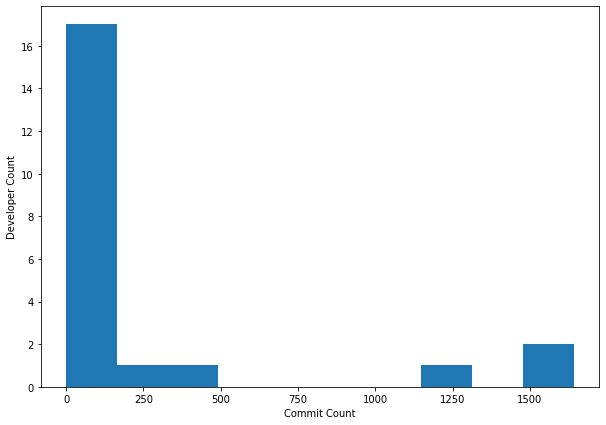

In [15]:
# histogram of committers
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(authors)
ax.set_xlabel('Commit Count')
ax.set_ylabel('Developer Count')

In [16]:
high_frequency_committers = authors[authors > 400]
high_frequency_committers.shape[0]

3

In [17]:
med_high_frequency_committers = authors[(authors > 100) & (authors <= 400)]
med_high_frequency_committers.shape[0]

3

In [18]:
med_frequency_committers = authors[(authors > 25) & (authors <= 100)]
med_frequency_committers.shape[0]

4

In [19]:
low_frequency_committers = authors[authors <= 25]
low_frequency_committers.shape[0]

12

In [ ]:
less_frequent_committers = authors[authors < 400]  # less_frequent_committers.shape = 71
fig2, ax2 = plt.subplots(figsize = (10, 7))
ax2.hist(less_frequent_committers)  # turtles all the way down  ;-)

In [ ]:
least_frequent_committers = authors[authors < 50]  # least_frequent_committers.shape = 59
fig3, ax3 = plt.subplots(figsize = (10, 7))
ax3.hist(least_frequent_committers)

In [ ]:
# committer buckets
high_frequency_committers.shape[0], med_high_frequency_committers.shape[0], med_frequency_committers.shape[0], low_frequency_committers.shape[0]

## The right research question

Assumption - The high and medium high frequency committers can probably refactor request well.  The goal should be best utilize the medium and low frequency committers to off-load the higher frequency committers.

In [ ]:
# how are classes distributed
classes = df_adangle['Class'].value_counts()
# classes.shape  # 3043
# type(classes)  # pandas.core.series.Series
classes.head(10)

### Other data particulars

+ There are multiple rows with the same CommitId so this field can not be used to identify unique rows in the data.
+ Are there repeated rows?
  - No, see below.
+ what is the size of the vocabulary used in the `Message` column

In [ ]:
## replace_with_space takes a string x and a list of characters removal_list 
## returns x with all the characters in removal_list replaced by ' '
def replace_with_space(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

In [ ]:
import string  # to get access to punctuation chars

# df_filtered.shape  # (8495, 9)
# df_filtered.drop_duplicates(inplace=False)
# df_filtered.shape  # (8495, 9) no change
messages_raw = df_filtered['Message']
# messages_raw.shape

## Remove digits
digits = [str(x) for x in range(10)]
digit_less = [replace_with_space(x, digits) for x in messages_raw]
## Remove punctuation
punc_less = [replace_with_space(x, list(string.punctuation)) for x in digit_less]
punc_less[0:5]  # lots empty/junky messages

In [ ]:
## clear messages that start with "    empty log message"
empty_log = 'empty log message'
clear_empty = ['' if x.__contains__(empty_log) else x for x in punc_less]
clear_empty[100:150]